# **3 Functions**
## All the things you can do with Python...and make them reusable!

## **3.1 Funtion basics**
Function definitions start with **def**...**def** for definition. Remember that spaces are extremeley important in Python and that the standard indentation is 4 spaces. As you are learning and using Jupyterlab, spaces and indentation will be automatically done for you. 
This is the basic structure of a function:

```Python
def function_name(parameters):
    # code starts here
    pass # this function doesn't do anything...or consider a return statement
    # return thing_to_return
```

Think of a Python function as a mathematical function of the form $y = f(x)$

$y$ is the output. $x$ is the input. When you apply function $f$ to $x$, the output is $y$. Clear as mud?

def defines a function that takes one or more parameters as inputs. You manipulate the inputs to produce an output, which you return with the keyword return. Let's see how it works with a real example. Once you run the next cell the function **times_two** will be available to the cells in this notebook.

In [237]:
def times_two(val):
    return val * 2

Which means that now we can use the function times_two whenever we want. So, let's do it!

In [238]:
times_two(10)

20

Tada! Pretty exciting, huh?

In [239]:
x = times_two(5)
y = times_two(8)

In [240]:
x * y

160

No longer do you have to write the code for **times_two**. It is available as a function and we can reuse a function. The actual name of the function and its parameters don't matter. You may pick the names, but you generally pick names that will mean something to the _user_. 

***
## 3.1.1 An error checking tangent
Note that we do not do any error checking on the type of value passed as a function parameter. What would happen if someone passed a _string_ to the function?

In [241]:
times_two('5')

'55'

So it turns out you can use the * operator with strings, but it concatenates them. So '5' * '5' equals '55'. Not what we expected. We could add some checking, which I'll demonstrate, but it's not really our focus for now.

One form error checking can take is the ```try except``` statement. You ```try``` _something_ and if _something_ doesn't work...if there is an exception, then execute the ```except``` part...but don't crash with an error.

In [242]:
def times_two_b(input):
    try:
        val = float(input)
        return val * 2
    except:
        return "Be sure your input is a number."

In [243]:
times_two_b(5)

10.0

In [244]:
times_two_b("what's up")

'Be sure your input is a number.'

Let's continue with this error checking tangent for one more line. Python is actually pretty smart. If someone inputs the string '5', it will convert it to the integer 5. Similarly, the string '5.1' will be converted to the float 5.1. However, the string 'five' will not be converted to a number. 

In [245]:
times_two_b('5')

10.0

***
## **3.2 Intermediate functions**
OK. Back to functions. Let's write a more complex function...at least a little more complex...and something that looks familiar.

In [246]:
def ndvi(red, nir):
    num = nir - red
    den = nir + red
    return num / den

In [247]:
ndvi(8, 55)

0.746031746031746

**Works great!**

Now, what if we wanted to stretch the ndvi value to the range of an 8-bit integer? We could do that do, too, in conjunction with another function.

In [248]:
def stretch(value, min_value, max_value, min_range, max_range):
    """
    Stretches the input value from min_range to max_range
    
    Parameters
    ----------
    value: number (int or float) 
        The value that will be stretched
    min_value: number (int or float)
        The minimum of all values that will be passed to this function
    max_value: number (int or float)
        The maximum of all values that will be passed to this function
    min_range: integer
        The minimum value in the output range of stretched values
    max_range: integer
        The maximum value in the output range of stretched values
    
    Returns
    -------
    The stretched input value.
    """
    
    input_range = max_value - min_value
    output_range = max_range - min_range
    norm_val = (value - min_value) / input_range
    
    return round(norm_val * output_range + min_range)

In [249]:
stretch(10, 10, 100, 1, 255) # What value should this return? If we are stretching values from 10 to 100 (the input values) from 1 to 255 (the stretched output values), and the value we want to stretch is 10...what should the output be? See if you can calculate it before running the code cell. Did it work?

1

In [250]:
stretch(100, 10, 100, 1, 255)

255

In [251]:
stretch(55, 10, 100, 1, 255)

128

In [252]:
stretch(11, 10, 100, 1, 255)

4

In [253]:
type(stretch(11, 10, 100, 1, 255))

int

One step further now. Let's pass a function to a function. Below, the function **ndvi** returns a value, and that return value is the first parameter in the **stretch** function.

In [254]:
stretch(ndvi(8, 60), -1, 1, 1, 255)

225

***
## **3.3 Function application to a _small_ image of our own making**
Now we will create a small image like we did in one of the previous tutorials. We will apply our 2 functions to this image. This will be a 2-band image with red and near-infrared bands. We'll approximate values for healthly vegetation on the left side of the image and snow on the right side.

In [255]:
import numpy as np
red_list = [
    5, 4, 3, 75,83, 79,
    4, 7, 5, 83, 81, 68,
    8, 7, 3, 69, 67, 91,
    3, 5, 7, 66, 74, 76
]
nir_list = [
    55, 49, 56, 77,85, 77,
    49, 57, 65, 82, 83, 66,
    48, 57, 63, 70, 64, 88,
    53, 65, 57, 72, 71, 76
]
red = np.array(red_list, dtype=np.float).reshape(4,6)
nir = np.array(nir_list, dtype=np.float).reshape(4,6)
img = np.array([red, nir])

In [256]:
img

array([[[ 5.,  4.,  3., 75., 83., 79.],
        [ 4.,  7.,  5., 83., 81., 68.],
        [ 8.,  7.,  3., 69., 67., 91.],
        [ 3.,  5.,  7., 66., 74., 76.]],

       [[55., 49., 56., 77., 85., 77.],
        [49., 57., 65., 82., 83., 66.],
        [48., 57., 63., 70., 64., 88.],
        [53., 65., 57., 72., 71., 76.]]])

In [257]:
info = img.shape
print("This image has " + str(info[1]) + " rows " + str(info[2]) + " columns and " + str(info[0]) + " bands.")
print("Each pixel is of type '" + str(img.dtype) + "'")

This image has 4 rows 6 columns and 2 bands.
Each pixel is of type 'float64'


In [258]:
%matplotlib inline 
# for an interactive plot, use '%matplotlib notebook' instead of '%matplotlib inline'
import matplotlib
import matplotlib.pyplot as plt

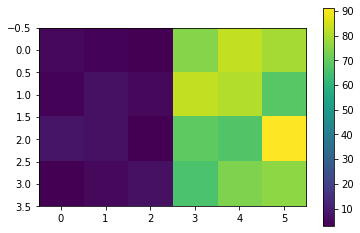

In [259]:
plt.imshow(img[0])
plt.colorbar()

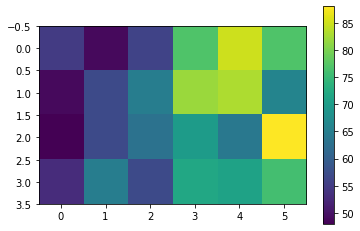

In [260]:
plt.imshow(img[1])
plt.colorbar()

In [261]:
bands = img.shape[0]
rows = img.shape[1]
cols = img.shape[2]

In [262]:
print(bands)
print(rows)
print(cols)

2
4
6


In [263]:
for b in range(bands):
    print()
    for r in range(rows):
        print()
        for c in range(cols):
            print(img[b][r][c], end=', ')



5.0, 4.0, 3.0, 75.0, 83.0, 79.0, 
4.0, 7.0, 5.0, 83.0, 81.0, 68.0, 
8.0, 7.0, 3.0, 69.0, 67.0, 91.0, 
3.0, 5.0, 7.0, 66.0, 74.0, 76.0, 

55.0, 49.0, 56.0, 77.0, 85.0, 77.0, 
49.0, 57.0, 65.0, 82.0, 83.0, 66.0, 
48.0, 57.0, 63.0, 70.0, 64.0, 88.0, 
53.0, 65.0, 57.0, 72.0, 71.0, 76.0, 

In [264]:
ndvi_output = np.empty([4, 6])
for r in range(rows):
    for c in range(cols):
        ndvi_output[r][c] = ndvi(img[0][r][c], img[1][r][c])

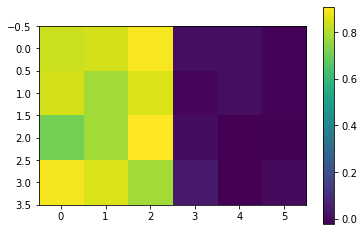

In [265]:
plt.imshow(ndvi_output)
plt.colorbar()

In [266]:
ndvi_min = ndvi_output.min()
ndvi_max = ndvi_output.max()
print(ndvi_min)
print(ndvi_max)

-0.022900763358778626
0.9090909090909091


In [267]:
ndvi_stretched = np.empty([4, 6])
for r in range(rows):
    for c in range(cols):
        ndvi_stretched[r][c] = stretch(ndvi_output[r][c], ndvi_min, ndvi_max, 1, 255)

In [268]:
ndvi_stretched

array([[234., 239., 252.,  11.,  10.,   4.],
       [239., 220., 241.,   6.,  11.,   3.],
       [202., 220., 255.,   9.,   1.,   3.],
       [251., 241., 220.,  19.,   2.,   7.]])

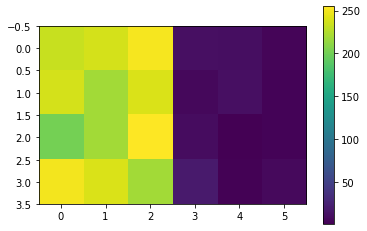

In [269]:
plt.imshow(ndvi_stretched)
plt.colorbar()

***
## **3.4 That was nice, but there is a faster, better way.**
In section 3.3, you learned about functions and applied them to a small image. We used ```for``` loops to iterate over our arrays. I hope that how and why we use a ```for``` loop was clear and that you feel more comfortable using them now. But, ```for``` loops are not the best method here. ```for``` loops are slow (in Python...not the case in C or derivatives) and there are more Pythonic ways to do things...and they are much faster, too. (Yes, Pythonic is really what they say.) **Numpy** is optimized for speed and has many functions that work on entire arrays at once. For example ```np.multiply(arr1, arr2)``` will multiple every element of the arrays ```arr1``` and ```arr2```. (Yes, the arrays have to be of the same size.) No more (explicit) iterating for you. 

In [270]:
num = np.subtract(nir, red)
den = np.add(nir, red)
ndvi2 = np.divide(num, den)

Before you continue, can you rewrute the ndvi calculation (the 3 lines of code from the cell above) as only one line of code? In the next cel, type: ```ndvi2 = ``` and finish the one line of code. The remaining code cells will only work if you calculate ndvi2 first.

In [ ]:
ndvi2 = 

In [281]:
ndvi2

array([[ 0.83333333,  0.8490566 ,  0.89830508,  0.01315789,  0.01190476,
        -0.01282051],
       [ 0.8490566 ,  0.78125   ,  0.85714286, -0.00606061,  0.01219512,
        -0.01492537],
       [ 0.71428571,  0.78125   ,  0.90909091,  0.00719424, -0.02290076,
        -0.01675978],
       [ 0.89285714,  0.85714286,  0.78125   ,  0.04347826, -0.02068966,
         0.        ]])

In [282]:
def stretch2(ndvi):
    return np.array(np.interp(ndvi2, (ndvi2.min(), ndvi2.max()), (1, 255)), dtype='int')

In [283]:
ndvi_stretch2 = stretch2(ndvi2)

In [284]:
ndvi_stretch2

array([[234, 238, 252,  10,  10,   3],
       [238, 220, 240,   5,  10,   3],
       [201, 220, 255,   9,   1,   2],
       [250, 240, 220,  19,   1,   7]])

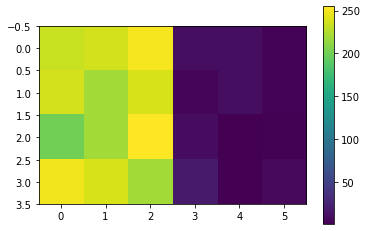

In [285]:
plt.imshow(ndvi_stretch2)
plt.colorbar()